In [30]:
import gym
import numpy as np
import random
import time

In [31]:
env = gym.make('FrozenLake-v1')

In [32]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [69]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

In [70]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, done, info = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [71]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [72]:
q_table

array([[0.59165796, 0.48891383, 0.527721  , 0.51985633],
       [0.14772479, 0.27672269, 0.18698153, 0.47855069],
       [0.43813179, 0.24406197, 0.22320104, 0.11438199],
       [0.06581601, 0.06219316, 0.01064008, 0.05969615],
       [0.62551642, 0.43539639, 0.4184919 , 0.4334603 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.12037254, 0.24388987, 0.35381419, 0.1620726 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.40477082, 0.34050576, 0.46728789, 0.66578573],
       [0.39569955, 0.6931635 , 0.34153084, 0.46137344],
       [0.63552533, 0.46830077, 0.4429641 , 0.37097483],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.43837224, 0.51469953, 0.76631734, 0.57906566],
       [0.71510039, 0.86662193, 0.684482  , 0.78362512],
       [0.        , 0.        , 0.        , 0.        ]])

In [73]:
sum(rewards_all)

12761.0

In [74]:
sum(rewards_all[0:1000])

154.0

In [75]:
sum(rewards_all[1000:2000])

618.0

In [76]:
sum(rewards_all[2000:3000])

657.0

In [77]:
sum(rewards_all[9000:10000])

643.0

In [78]:
sum(rewards_all[19000:20000])

691.0

In [85]:
#@title Install package
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1

In [86]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [87]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(720, 480))
display.start()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [90]:
def play(env, q_table, render=False):
    state = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')
        
    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            screen = env.render(mode='rgb_array')
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.5)

        state = next_state

    return (total_reward, steps)

In [80]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [92]:
play_multiple_times(env, q_table, 1000)

Number of successes: 736/1000
Average number of steps: 37.95108695652174


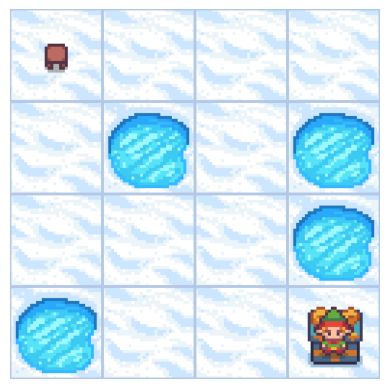

(1.0, 15)

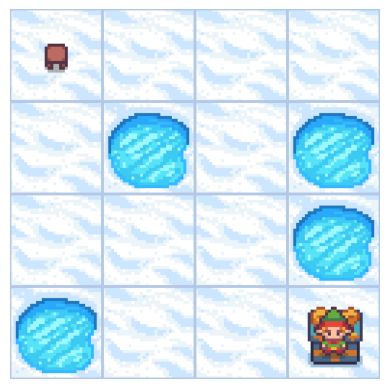

In [93]:
play(env, q_table, render=True)

In [126]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [127]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

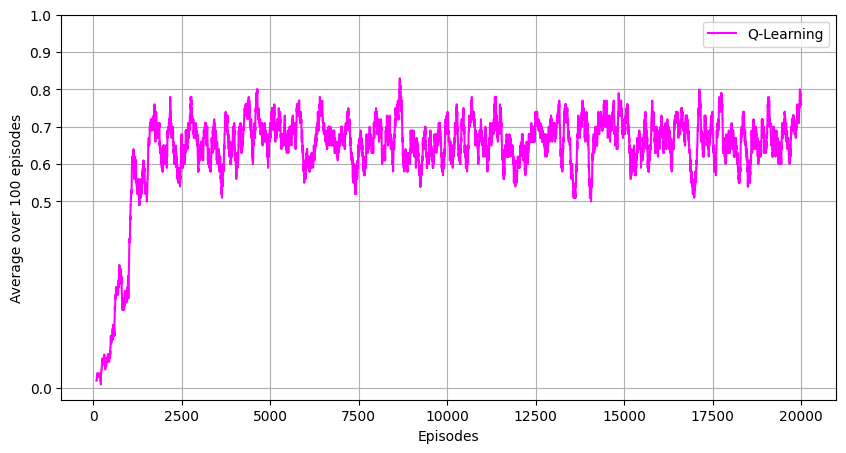

In [128]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()